In [1]:
import numpy as np
import pandas as pd
import sklearn


In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns
from matplotlib import patches

In [4]:
import warnings

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold

In [8]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [9]:
warnings.filterwarnings("ignore")

In [10]:
%matplotlib inline

In [11]:
sns.set(rc={"figure.figsize": (20, 15)})

In [12]:
sns.set_style("whitegrid")

In [13]:
df_train=pd.read_csv('train.csv')

In [14]:
df_test=pd.read_csv('test.csv')

In [15]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [16]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [17]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
df_train.shape

(1460, 81)

In [20]:
df_test.shape

(1459, 80)

In [21]:
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [24]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000
Functional        0  0.000000
Fireplaces        0  0.000000
KitchenQual       0  0.000000
KitchenAbvGr      0  0.000000
BedroomAbvGr      0  0.000000
HalfBath          0  0.000000
FullBath          0  0.000000
BsmtHalfBath      0  0.000000
TotRmsAbvGrd      0  0.000000
GarageCars        0  0.000000

In [25]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
MasVnrType      894  0.612748
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageCond       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371
Utilities         2  0.001371
Functional        2  0.001371
BsmtFullBath      2  0.001371
BsmtFinSF1        1  0.000685
BsmtFinSF2        1  0.000685
BsmtUnfSF         1  0.000685
KitchenQual       1  0.000685
TotalBsmtSF       1  0.000685
Exterior2nd       1  0.000685
GarageCars        1  0.000685
Exterior1st       1  0.000685
GarageArea        1  0.000685
SaleType          1  0.000685
MiscVal           0  0.000000
BedroomAbvGr      0  0.000000
KitchenAbvGr      0  0.000000
YrSold            0  0.000000
TotRmsAbvGrd      0  0.000000
MoSold            0  0.000000
Fireplaces        0  0.000000

In [26]:
df_train.drop(columns=['Id'],inplace=True)

In [27]:
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [28]:
df_train_num=df_train.select_dtypes(exclude=['object'])

In [29]:
df_train_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
df_train_num.shape

(1460, 37)

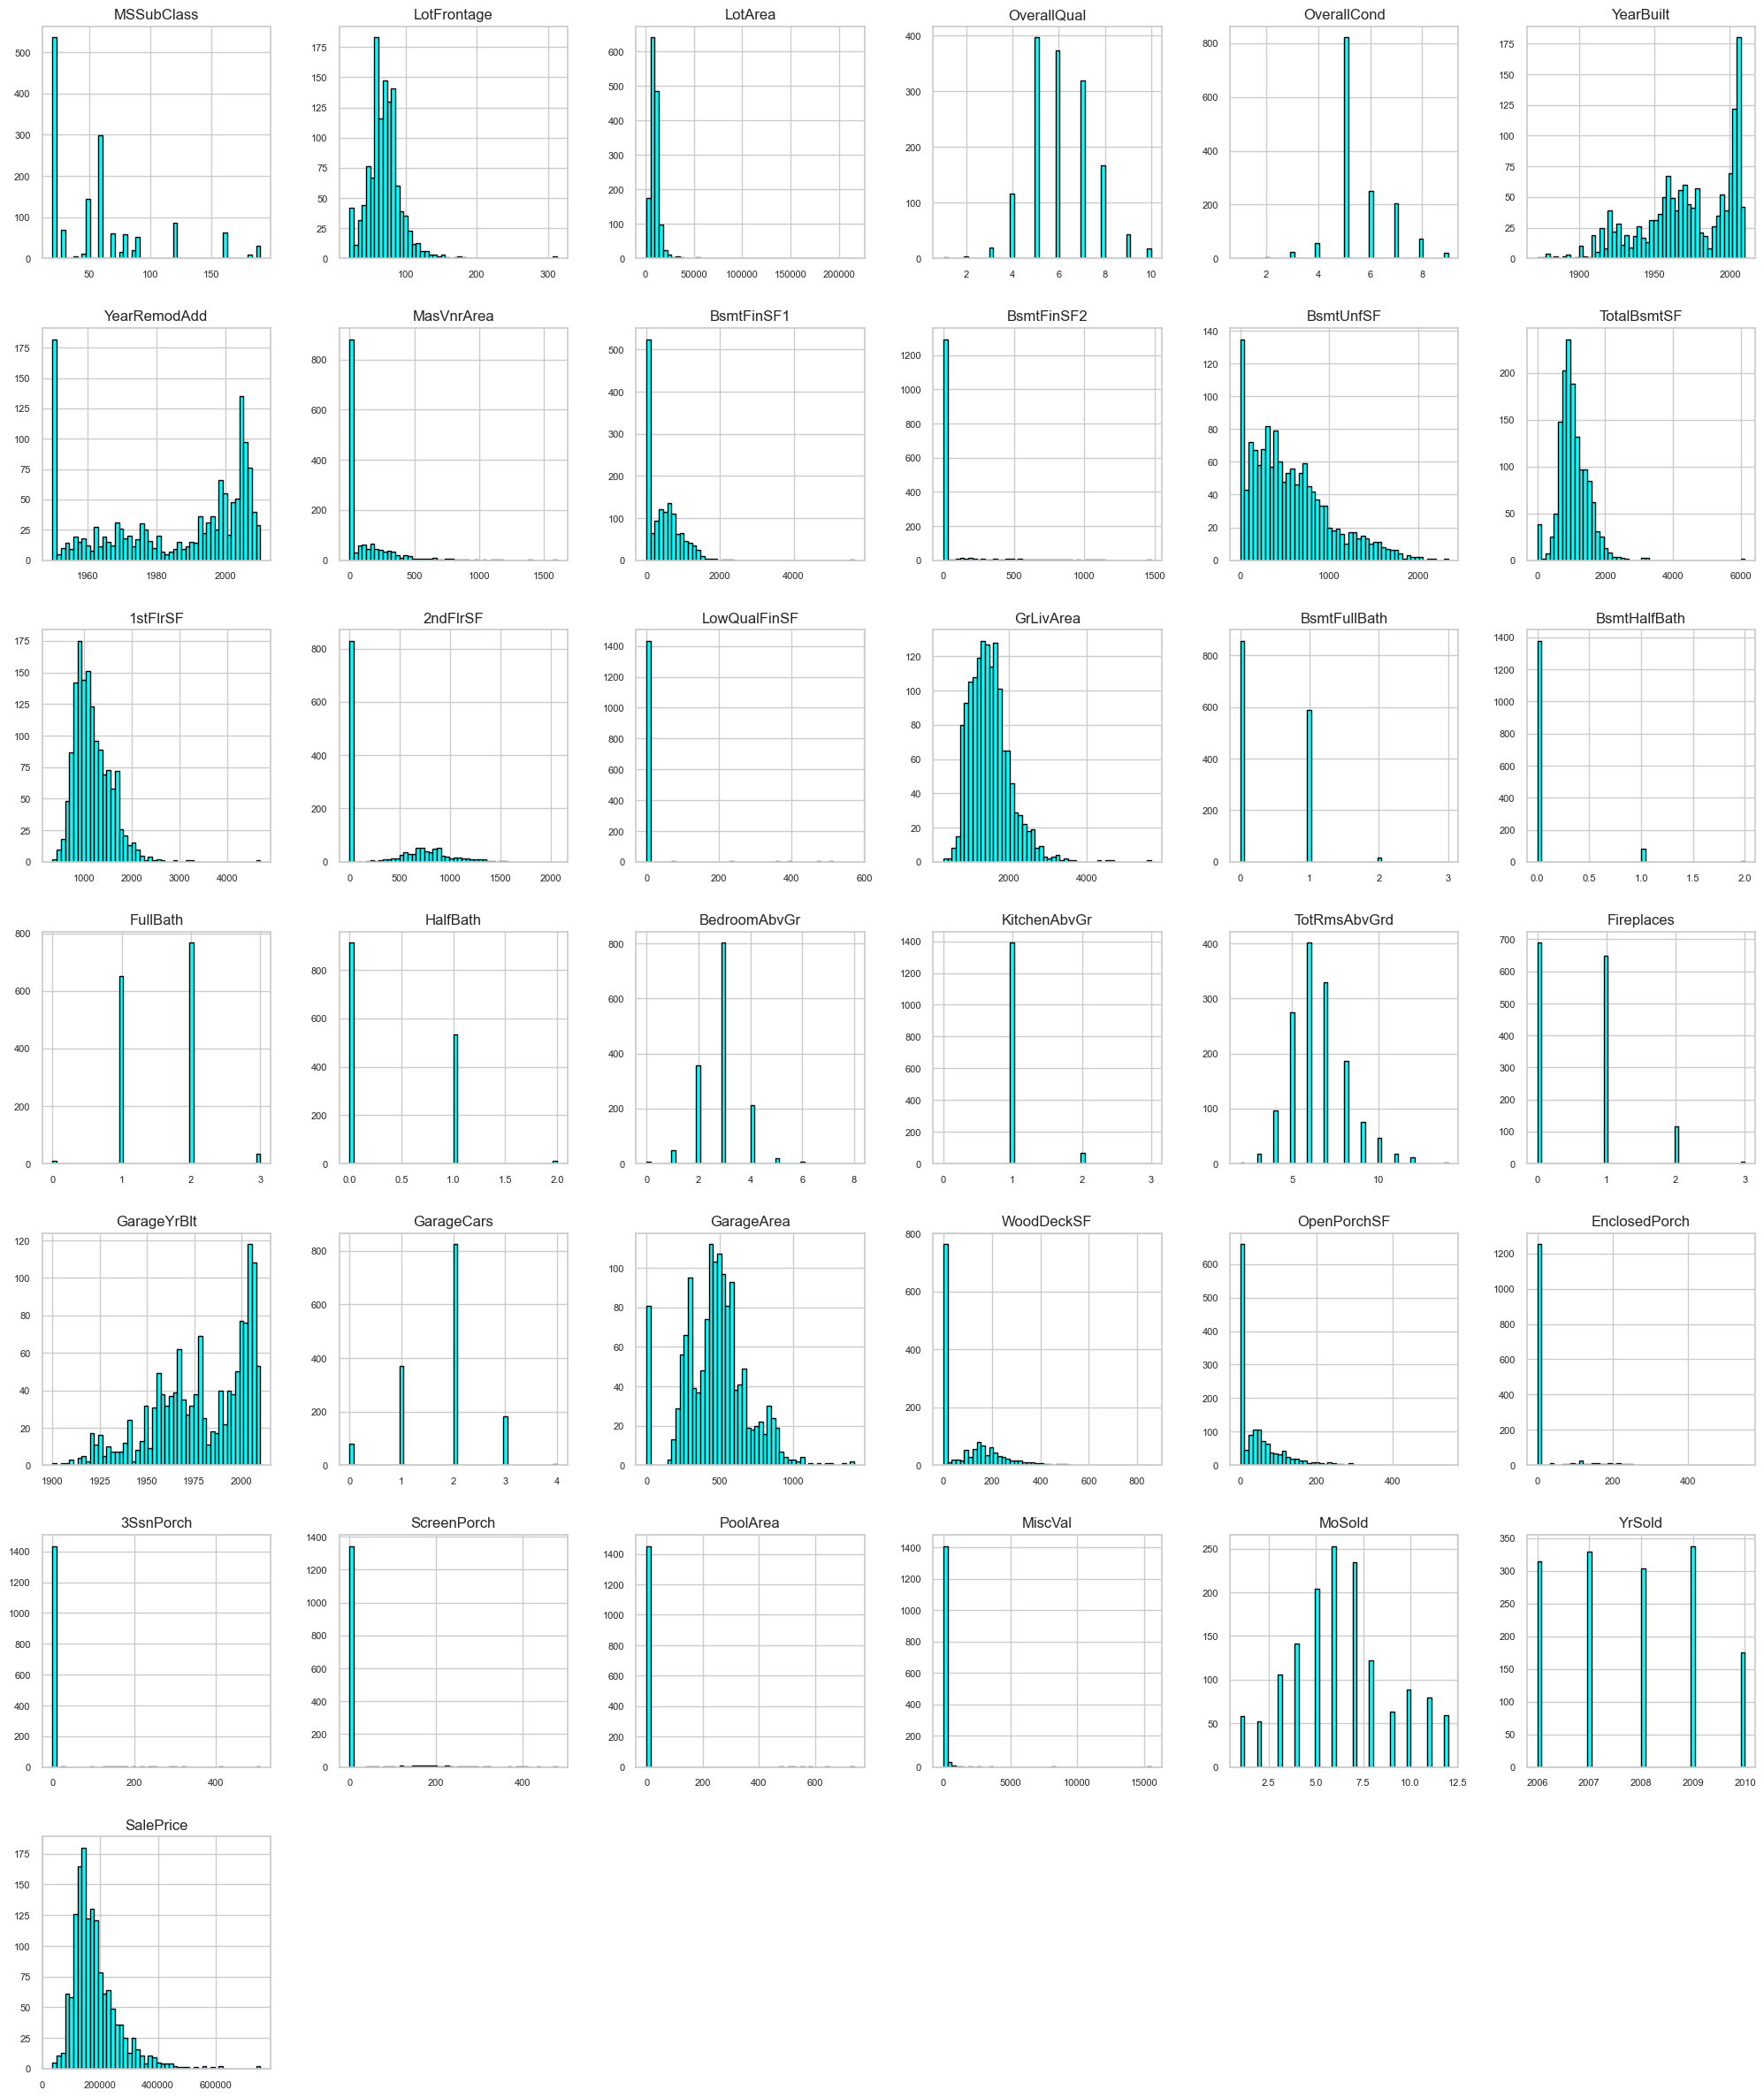

In [42]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="cyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

In [31]:
df_test_num=df_test.select_dtypes(exclude=['object'])

In [32]:
df_test_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

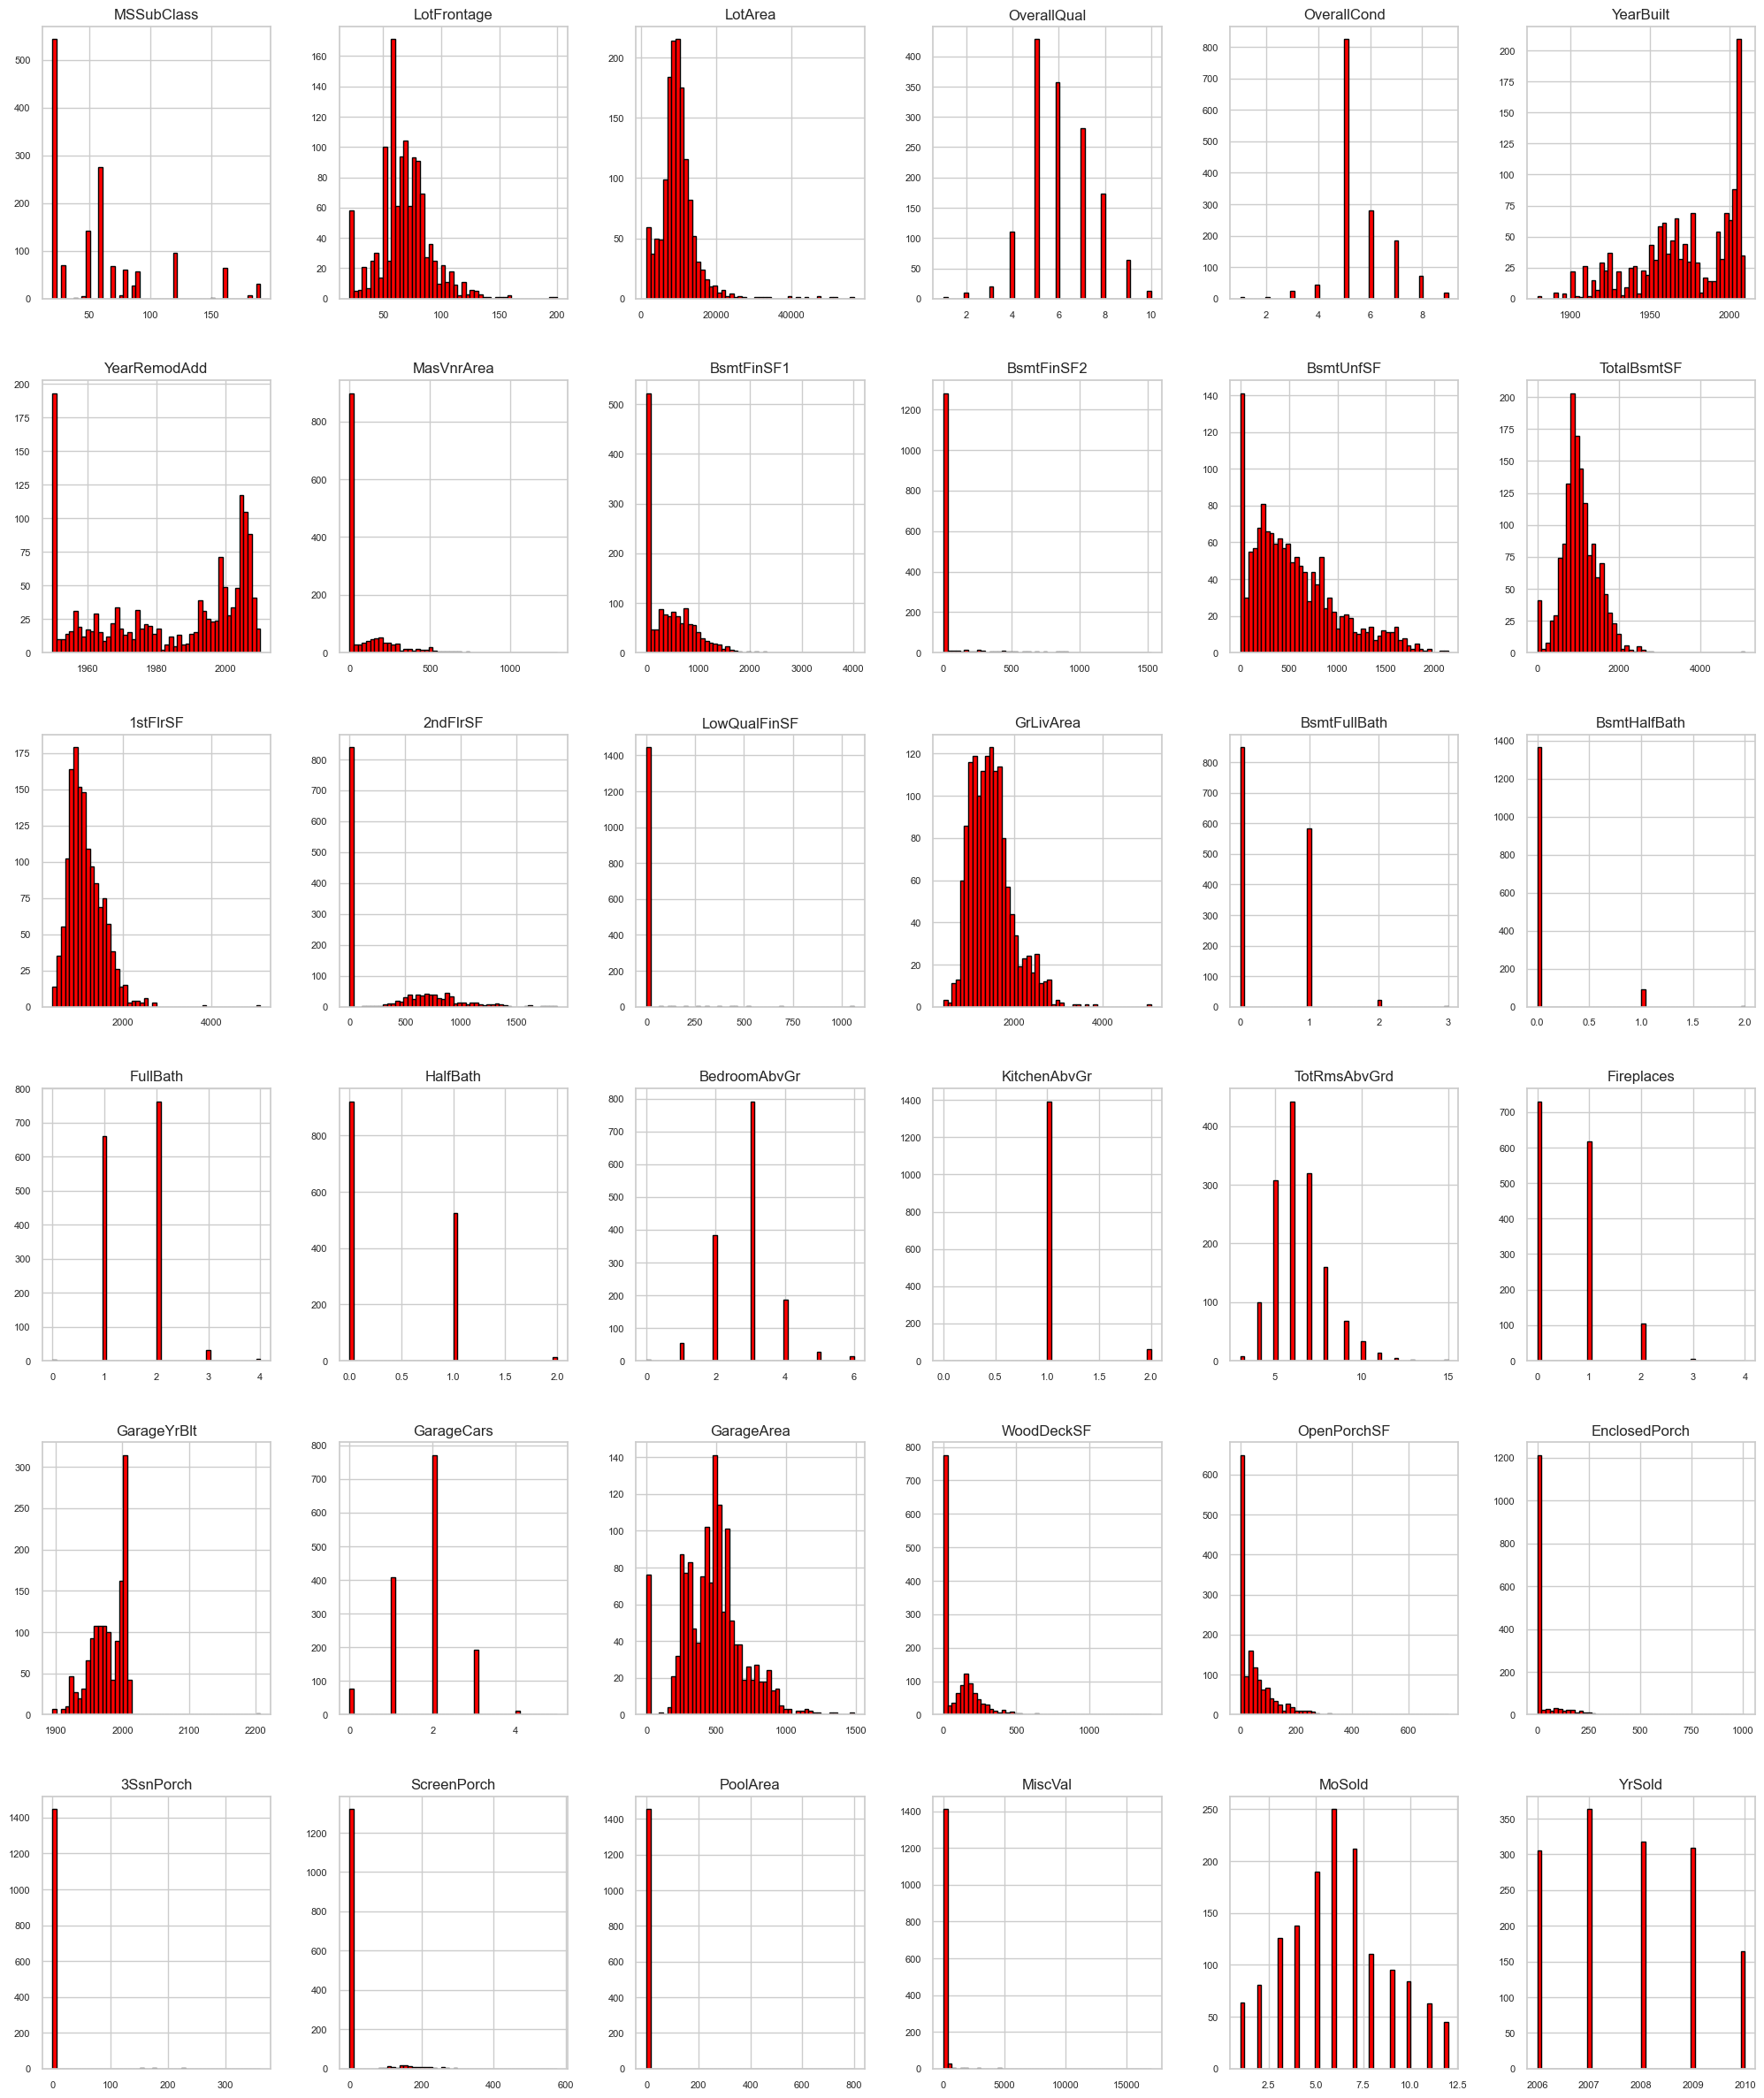

In [33]:
fig_=df_test_num.hist(figsize=(25,30),bins=50,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8)

In [34]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [35]:
print(df_train_num.shape)

(1460, 36)


In [36]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [37]:
df_test_num.shape

(1459, 35)

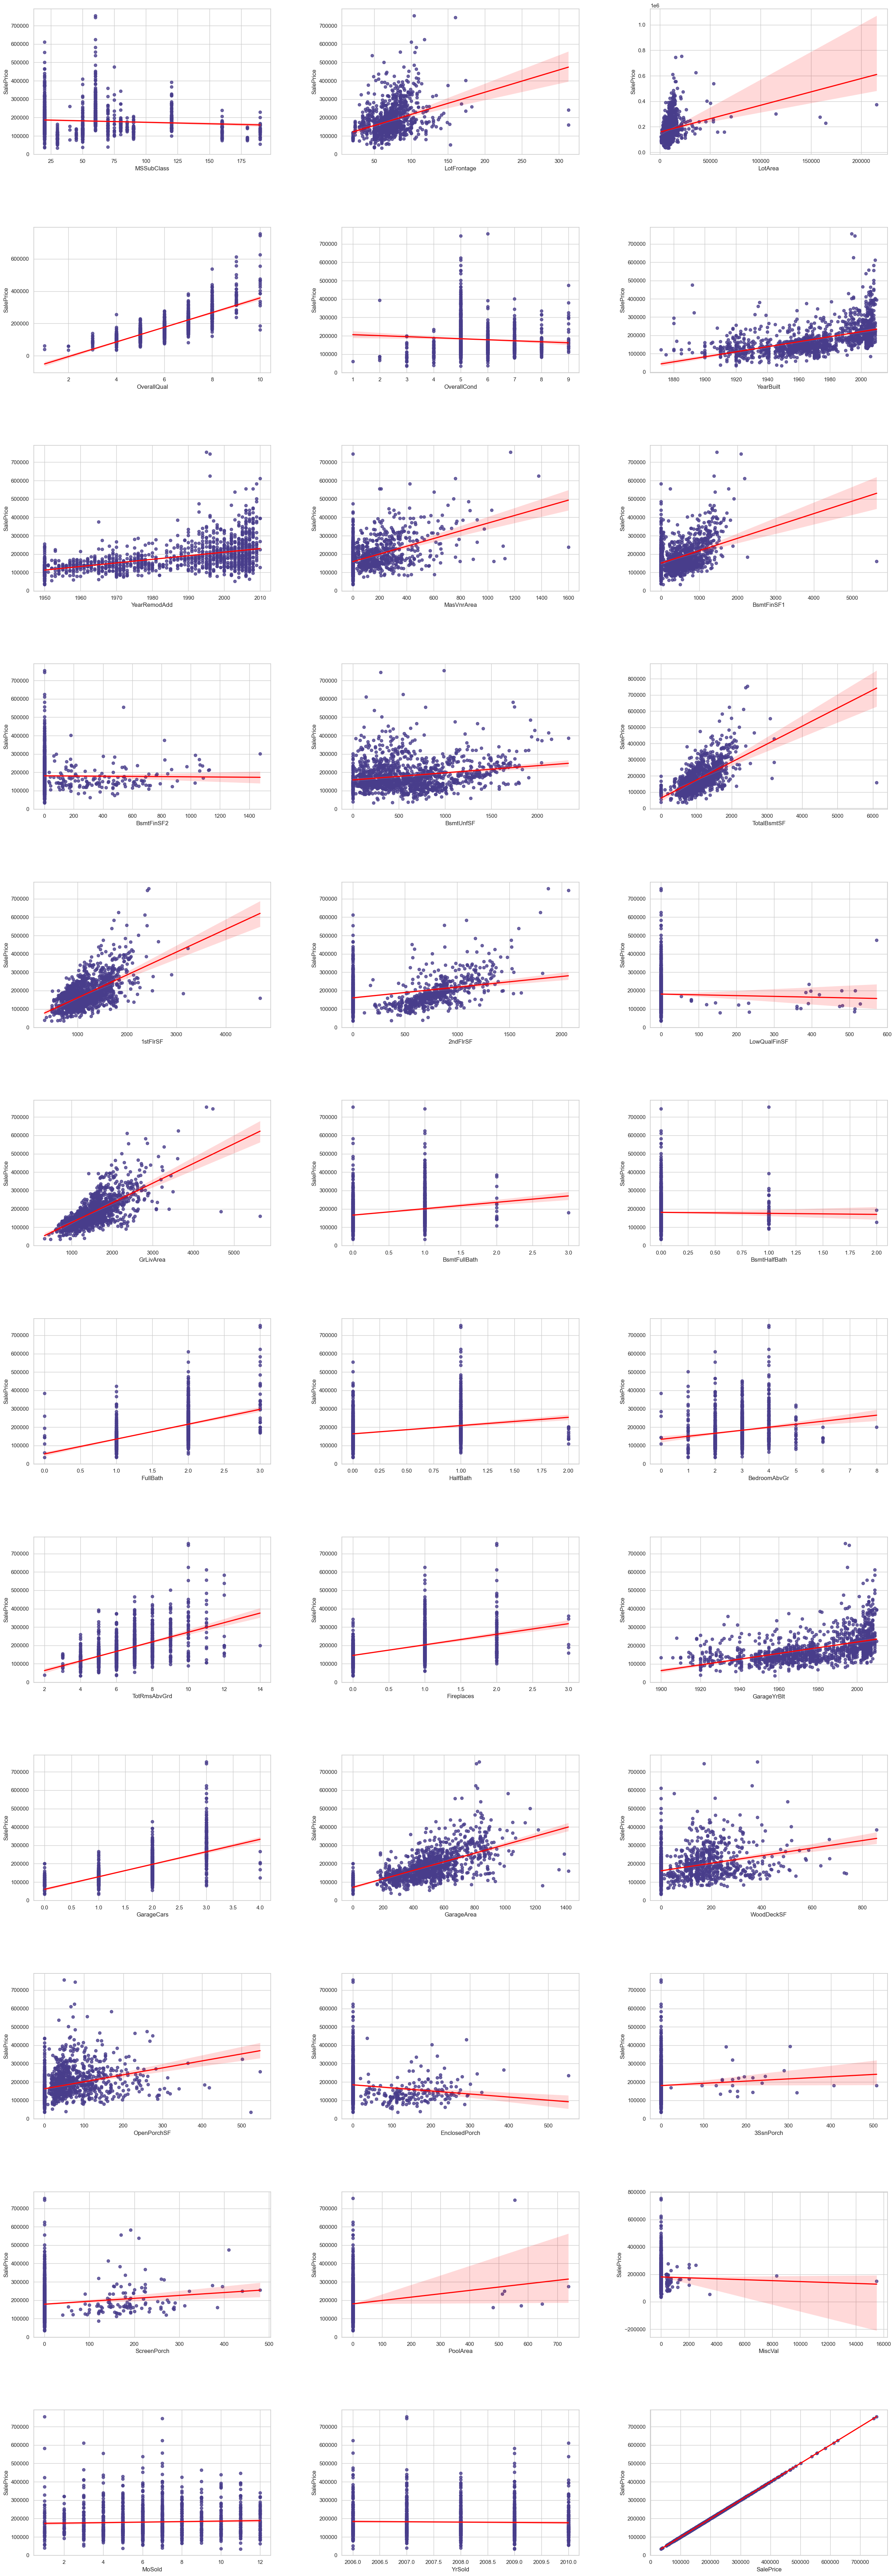

In [38]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

<Axes: >

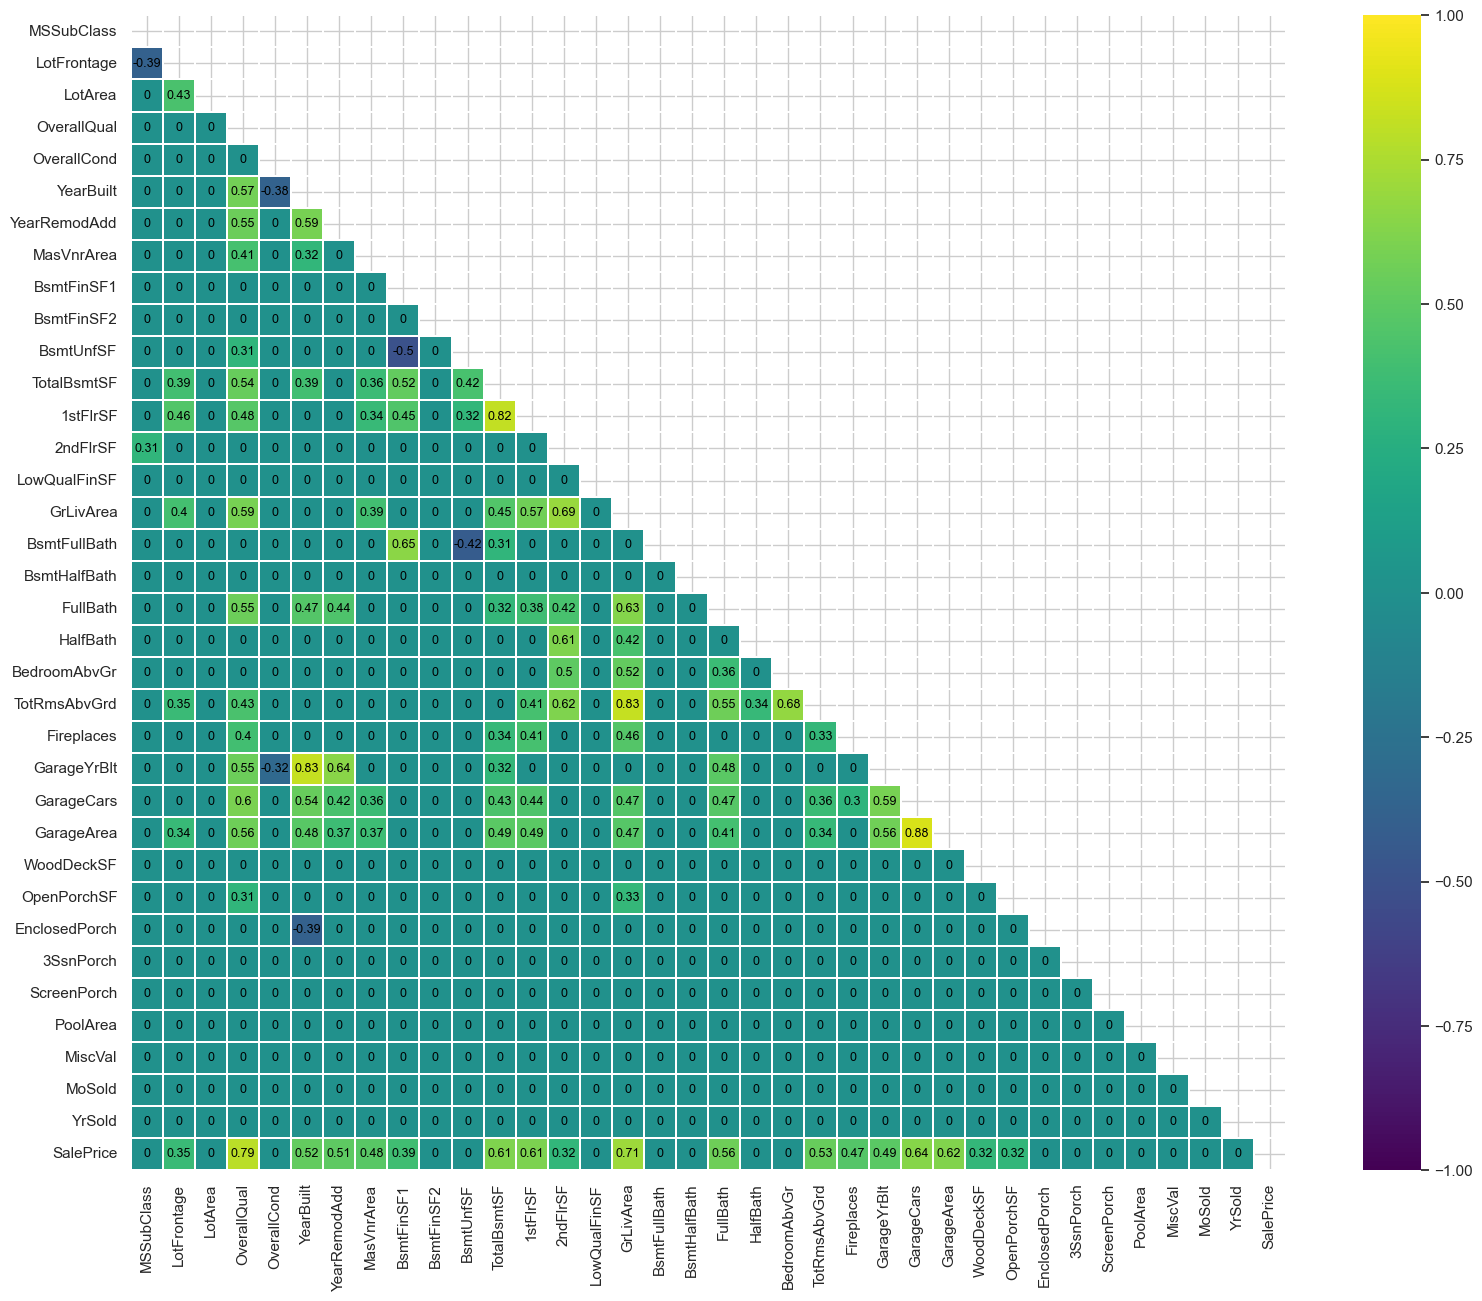

In [39]:

pd.options.display.float_format = "{:,.2f}".format


corr_matrix = df_train_num.corr(method = 'pearson')


corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


cmap = "viridis"


sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [40]:
XSC = ["GarageArea", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"]
XSC

['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64



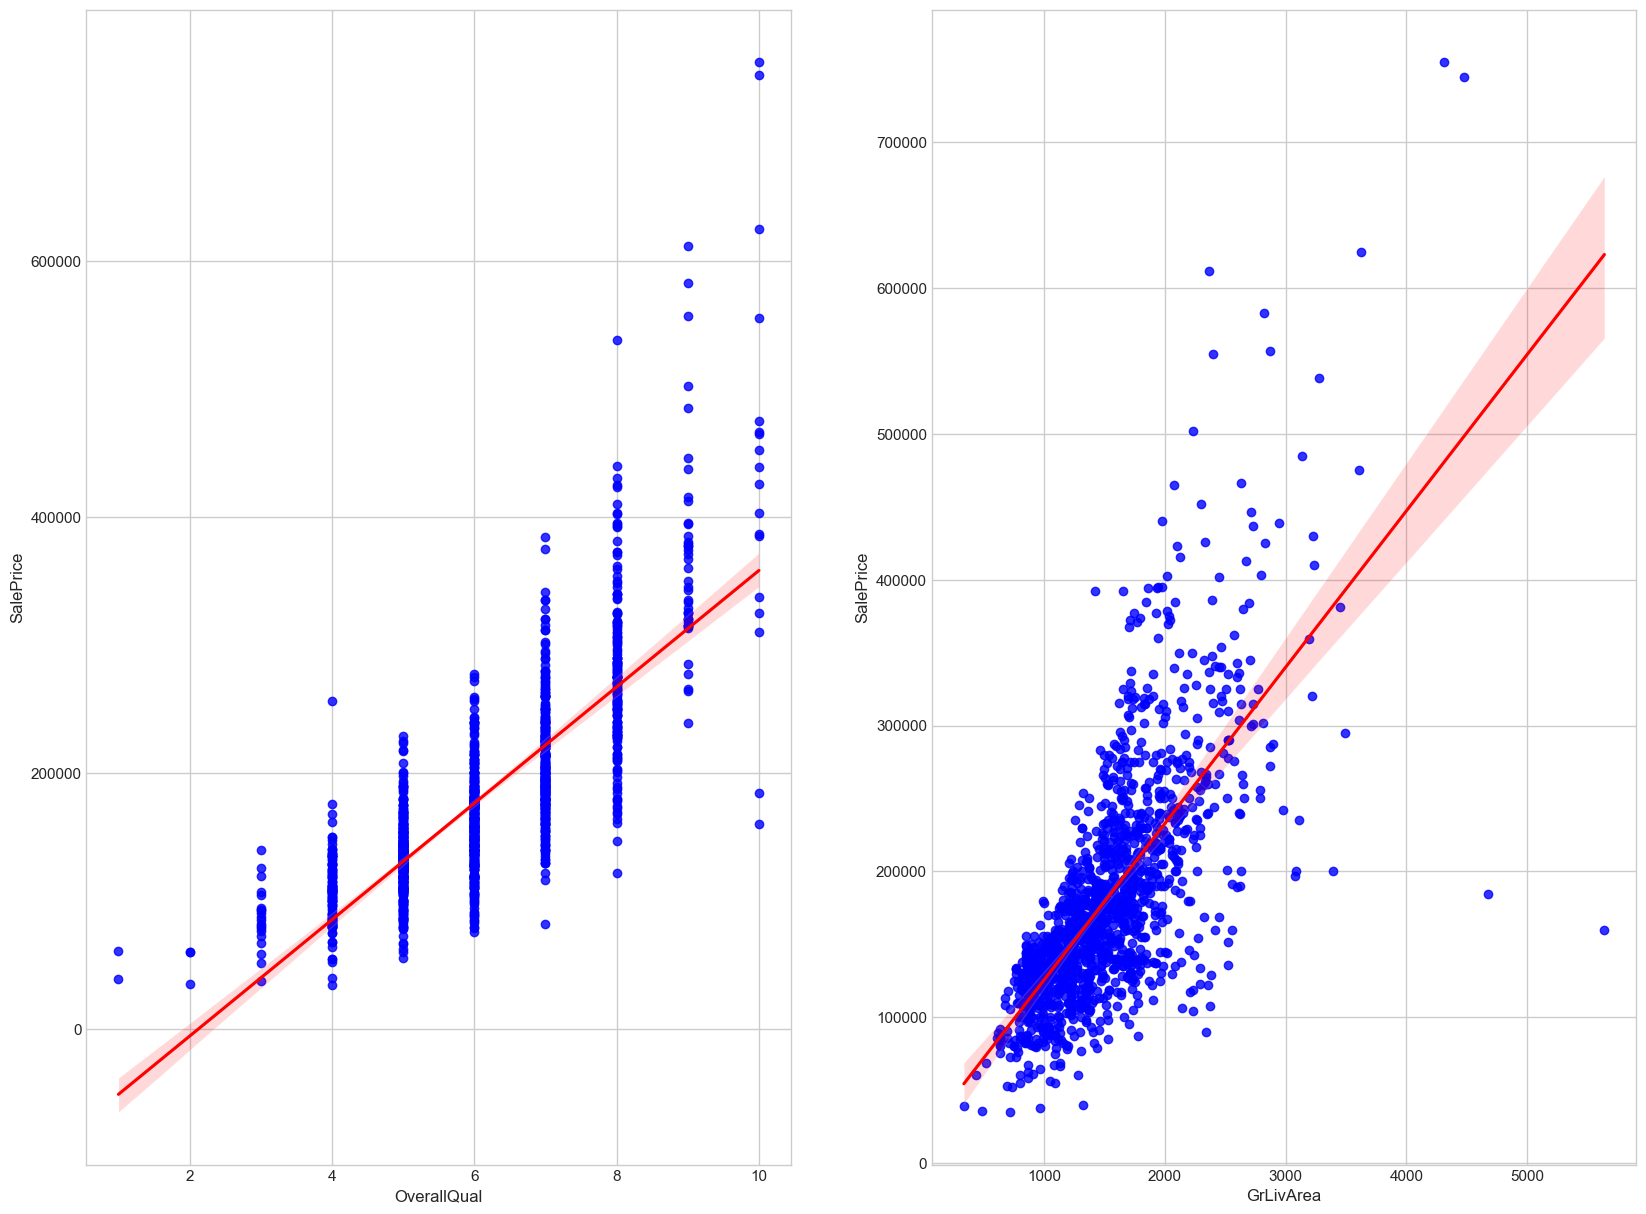

In [41]:
df_num_corr = df_train_num.corr()["SalePrice"][:-1]
# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

strong_features = df_num_corr[abs(df_num_corr) >= 0.7].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 2)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "red"})

In [42]:

# Correlated features (0.5 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].index.tolist()
moderate_features.append("SalePrice")

df_moderate_features = df_train_num.loc[:, moderate_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(moderate_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(moderate_features)-1:
        sns.regplot(x=moderate_features[i], y="SalePrice", data=df_moderate_features, ax=ax, scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64



In [43]:
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

# Features with low correlation (between 0.3 and 0.5)
weak_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
weak_features.append("SalePrice")

df_weak_features = df_train_num.loc[:, weak_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(weak_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(weak_features) - 1:
        sns.regplot(x=weak_features[i], y="SalePrice", data=df_weak_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"},)

8 weakly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [44]:
list_of_numerical_features = strong_features[:-1] + moderate_features[:-1] + weak_features

# select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

# Display except the last column
df_train_num.iloc[:, :-1]

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0               7       1710       2003          2003          856       856   
1               6       1262       1976          1976         1262      1262   
2               7       1786       2001          2002          920       920   
3               7       1717       1915          1970          756       961   
4               8       2198       2000          2000         1145      1145   
...           ...        ...        ...           ...          ...       ...   
1455            6       1647       1999          2000          953       953   
1456            6       2073       1978          1988         1542      2073   
1457            7       2340       1941          2006         1152      1188   
1458            5       1078       1950          1996         1078      1078   
1459            5       1256       1965          1965         1256      1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  LotFrontage  MasVnrArea  \
0            2             8           2         548        65.00      196.00   
1            2             6           2         460        80.00        0.00   
2            2             6           2         608        68.00      162.00   
3            1             7           3         642        60.00        0.00   
4            2             9           3         836        84.00      350.00   
...        ...           ...         ...         ...          ...         ...   
1455         2             7           2         460        62.00        0.00   
1456         2             7           2         500        85.00      119.00   
1457         2             9           1         252        66.00        0.00   
1458         1             5           1         240        68.00        0.00   
1459         1             6           1         276        75.00        0.00   

      BsmtFinSF1  2ndFlrSF  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  
0            706       854           0     2,003.00           0           61  
1            978         0           1     1,976.00         298            0  
2            486       866           1     2,001.00           0           42  
3            216       756           1     1,998.00           0           35  
4            655      1053           1     2,000.00         192           84  
...          ...       ...         ...          ...         ...          ...  
1455           0       694           1     1,999.00           0           40  
1456         790         0           2     1,978.00         349            0  
1457         275      1152           2     1,941.00           0           60  
1458          49         0           0     1,950.00         366            0  
1459         830         0           0     1,965.00         736           68  

[1460 rows x 18 columns]

In [45]:
for i, col in enumerate(XSC):
    if col in df_train_num.columns:
        df_train_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_3 = [x for x in XSC if x not in df_train_num.columns]
print(f"Columns present in XSC and absent in df_train_num: {dif_3}\n")

# Testing set
for i, col in enumerate(XSC):
    if col in df_test_num.columns:
        df_test_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_4 = [x for x in XSC if x not in df_test_num.columns]
print(f"Columns present in XSC and absent in df_test_num: {dif_4}\n")

Columns present in XSC and absent in df_train_num: ['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

Columns present in XSC and absent in df_test_num: ['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']



In [46]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'SalePrice']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and 
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])
  # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    #print('--- Index of Outliers ----')
    #print(outlierIndexes)

    #print('--- Observations found as outlier -----')
    #print(df[ distances > cutoff , :])

    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
    # Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(9, 2, i+1)
    ax.add_artist(ellipse)
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

Text(0, 0.5, 'Column Name\n')

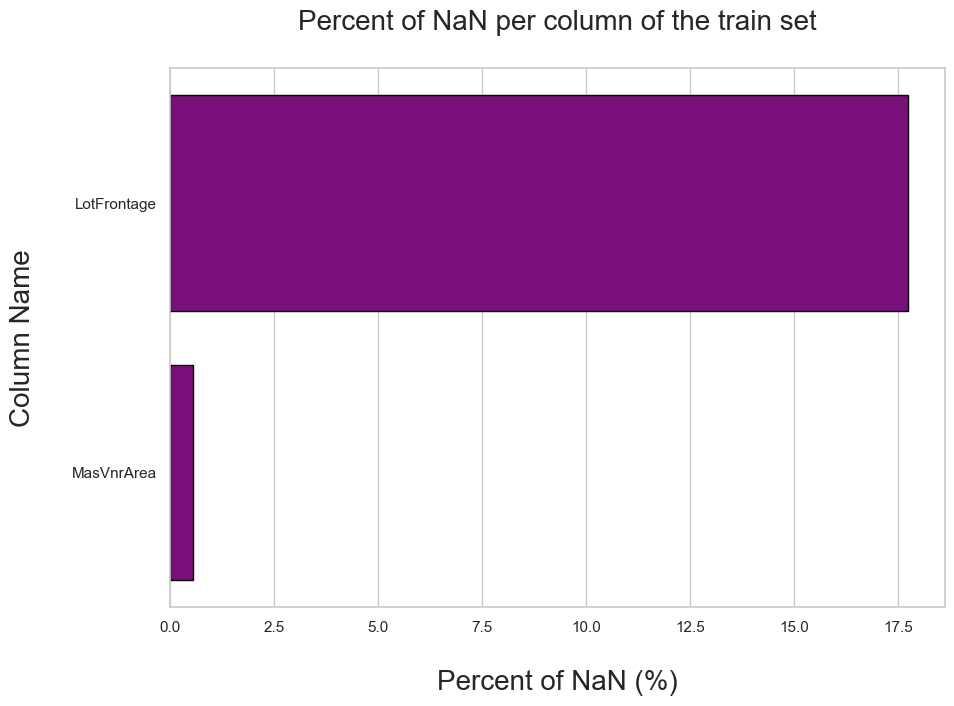

In [47]:
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [48]:
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))

In [49]:
df_train_num

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  FullBath  \
0               7       1710       2003          2003          856         2   
1               6       1262       1976          1976         1262         2   
2               7       1786       2001          2002          920         2   
3               7       1717       1915          1970          756         1   
4               8       2198       2000          2000         1145         2   
...           ...        ...        ...           ...          ...       ...   
1455            6       1647       1999          2000          953         2   
1456            6       2073       1978          1988         1542         2   
1457            7       2340       1941          2006         1152         2   
1458            5       1078       1950          1996         1078         1   
1459            5       1256       1965          1965         1256         1   

      GarageCars  LotFrontage  MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  \
0              2        65.00      196.00         706       854           0   
1              2        80.00        0.00         978         0           1   
2              2        68.00      162.00         486       866           1   
3              3        60.00        0.00         216       756           1   
4              3        84.00      350.00         655      1053           1   
...          ...          ...         ...         ...       ...         ...   
1455           2        62.00        0.00           0       694           1   
1456           2        85.00      119.00         790         0           2   
1457           1        66.00        0.00         275      1152           2   
1458           1        68.00        0.00          49         0           0   
1459           1        75.00        0.00         830         0           0   

      WoodDeckSF  OpenPorchSF  SalePrice  
0              0           61     208500  
1            298            0     181500  
2              0           42     223500  
3              0           35     140000  
4            192           84     250000  
...          ...          ...        ...  
1455           0           40     175000  
1456         349            0     210000  
1457           0           60     266500  
1458         366            0     142125  
1459         736           68     147500  

[1460 rows x 15 columns]

In [50]:
df_train_imputed.columns = df_train_num.columns

In [51]:
df_train_imputed

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  FullBath  \
0            7.00   1,710.00   2,003.00      2,003.00       856.00      2.00   
1            6.00   1,262.00   1,976.00      1,976.00     1,262.00      2.00   
2            7.00   1,786.00   2,001.00      2,002.00       920.00      2.00   
3            7.00   1,717.00   1,915.00      1,970.00       756.00      1.00   
4            8.00   2,198.00   2,000.00      2,000.00     1,145.00      2.00   
...           ...        ...        ...           ...          ...       ...   
1455         6.00   1,647.00   1,999.00      2,000.00       953.00      2.00   
1456         6.00   2,073.00   1,978.00      1,988.00     1,542.00      2.00   
1457         7.00   2,340.00   1,941.00      2,006.00     1,152.00      2.00   
1458         5.00   1,078.00   1,950.00      1,996.00     1,078.00      1.00   
1459         5.00   1,256.00   1,965.00      1,965.00     1,256.00      1.00   

      GarageCars  LotFrontage  MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  \
0           2.00        65.00      196.00      706.00    854.00        0.00   
1           2.00        80.00        0.00      978.00      0.00        1.00   
2           2.00        68.00      162.00      486.00    866.00        1.00   
3           3.00        60.00        0.00      216.00    756.00        1.00   
4           3.00        84.00      350.00      655.00  1,053.00        1.00   
...          ...          ...         ...         ...       ...         ...   
1455        2.00        62.00        0.00        0.00    694.00        1.00   
1456        2.00        85.00      119.00      790.00      0.00        2.00   
1457        1.00        66.00        0.00      275.00  1,152.00        2.00   
1458        1.00        68.00        0.00       49.00      0.00        0.00   
1459        1.00        75.00        0.00      830.00      0.00        0.00   

      WoodDeckSF  OpenPorchSF  SalePrice  
0           0.00        61.00 208,500.00  
1         298.00         0.00 181,500.00  
2           0.00        42.00 223,500.00  
3           0.00        35.00 140,000.00  
4         192.00        84.00 250,000.00  
...          ...          ...        ...  
1455        0.00        40.00 175,000.00  
1456      349.00         0.00 210,000.00  
1457        0.00        60.00 266,500.00  
1458      366.00         0.00 142,125.00  
1459      736.00        68.00 147,500.00  

[1460 rows x 15 columns]

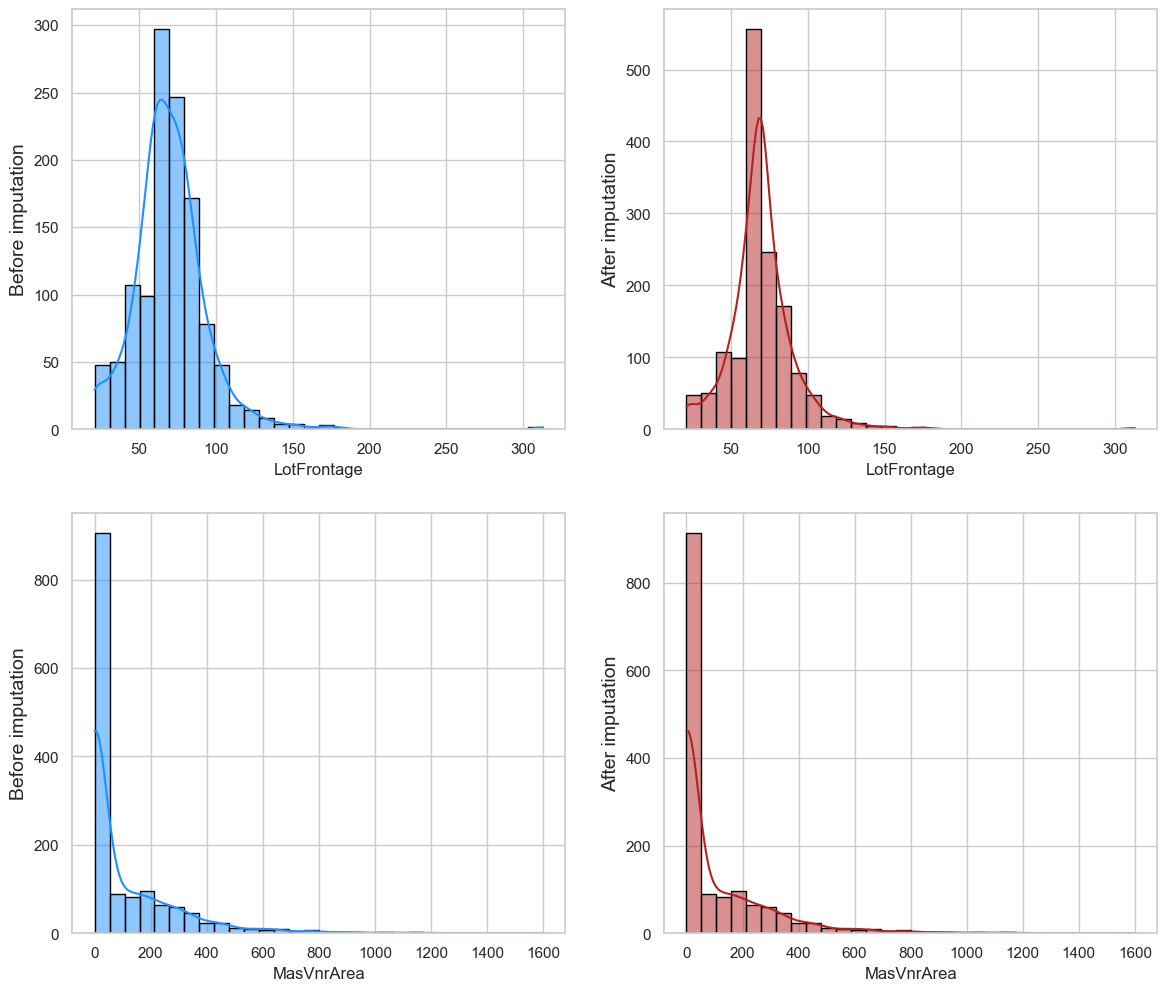

In [52]:
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "MasVnrArea"], [0, 1]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [53]:
df_train_imputed.drop(["LotFrontage"], axis=1, inplace=True)

# Drop the same features from testing set 
df_test_num.drop(["LotFrontage"], axis=1, inplace=True)

df_train_imputed.head()

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  FullBath  \
0         7.00   1,710.00   2,003.00      2,003.00       856.00      2.00   
1         6.00   1,262.00   1,976.00      1,976.00     1,262.00      2.00   
2         7.00   1,786.00   2,001.00      2,002.00       920.00      2.00   
3         7.00   1,717.00   1,915.00      1,970.00       756.00      1.00   
4         8.00   2,198.00   2,000.00      2,000.00     1,145.00      2.00   

   GarageCars  MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  \
0        2.00      196.00      706.00    854.00        0.00        0.00   
1        2.00        0.00      978.00      0.00        1.00      298.00   
2        2.00      162.00      486.00    866.00        1.00        0.00   
3        3.00        0.00      216.00    756.00        1.00        0.00   
4        3.00      350.00      655.00  1,053.00        1.00      192.00   

   OpenPorchSF  SalePrice  
0        61.00 208,500.00  
1         0.00 181,500.00  
2        42.00 223,500.00  
3        35.00 140,000.00  
4        84.00 250,000.00

Text(0, 0.5, 'Column Name\n')

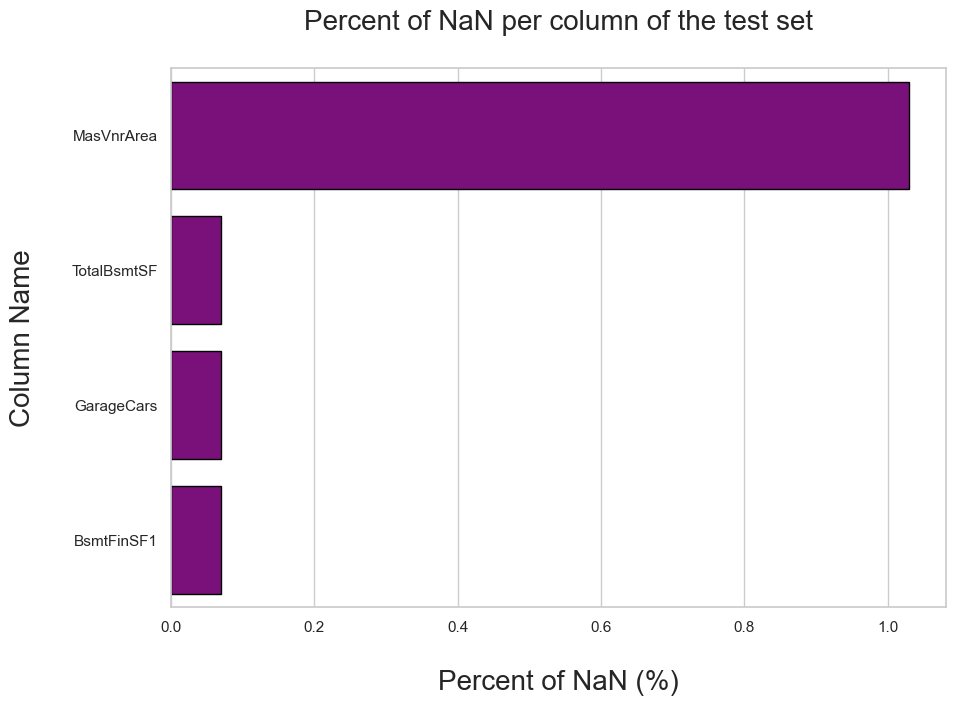

In [54]:
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [55]:
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

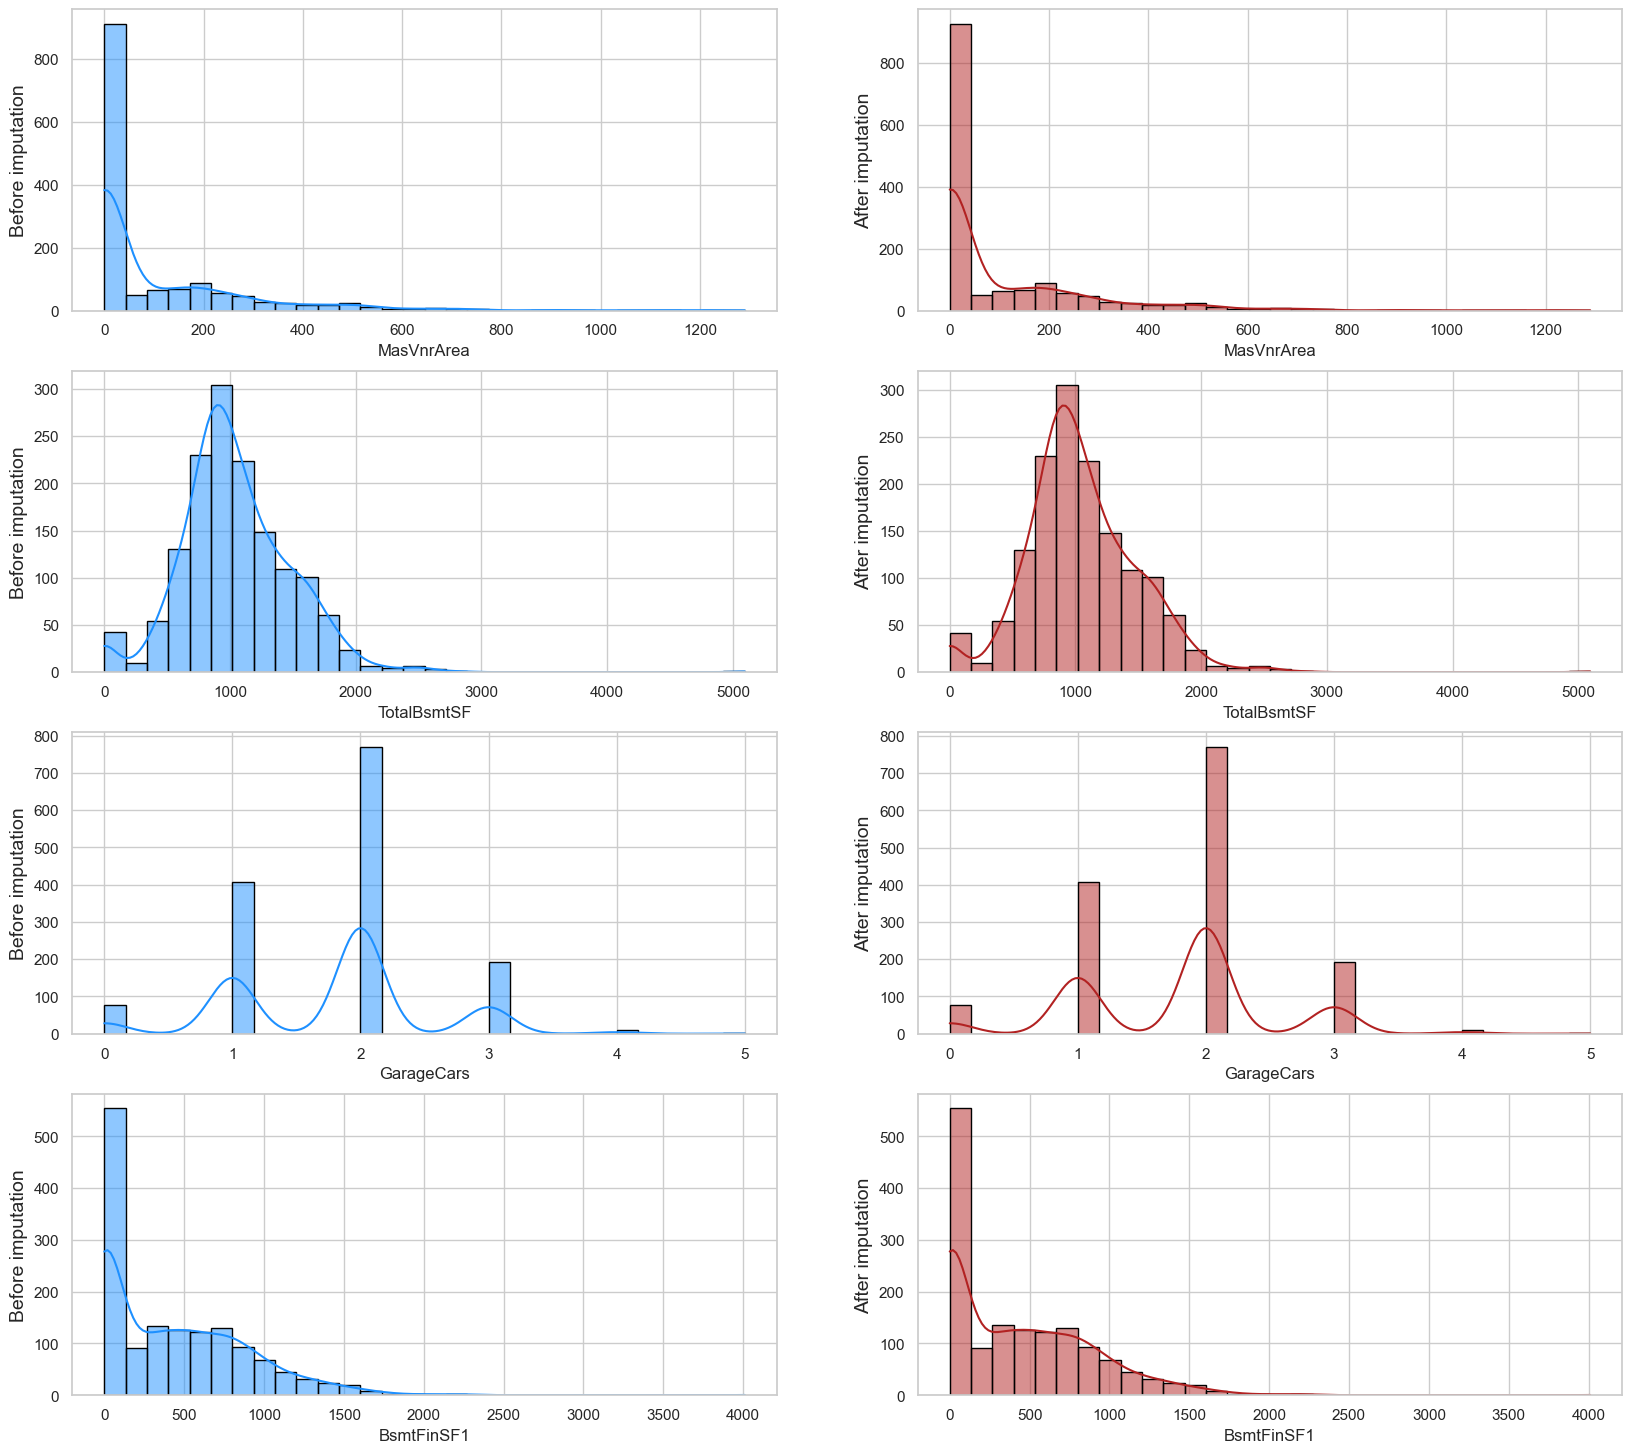

In [56]:
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

In [60]:
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

In [61]:
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

In [62]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 44)

Test set shape (Categorical features): (1459, 43)



In [63]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

In [64]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

# Training set
df_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(cols_to_drop, axis=1, inplace=True)

In [65]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 29)

Test set shape (Categorical features): (1459, 28)



In [66]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

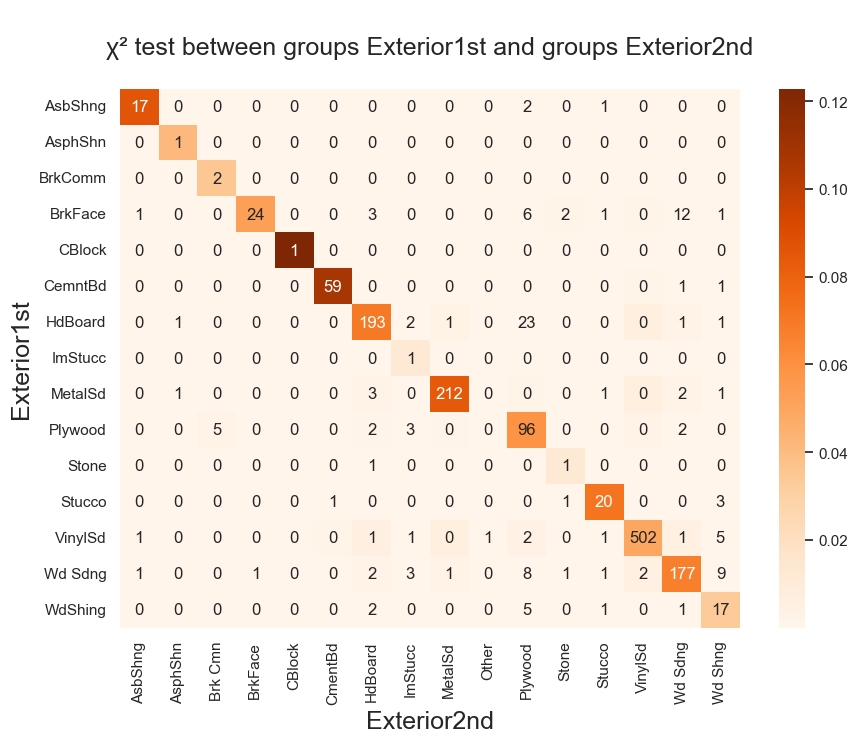

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



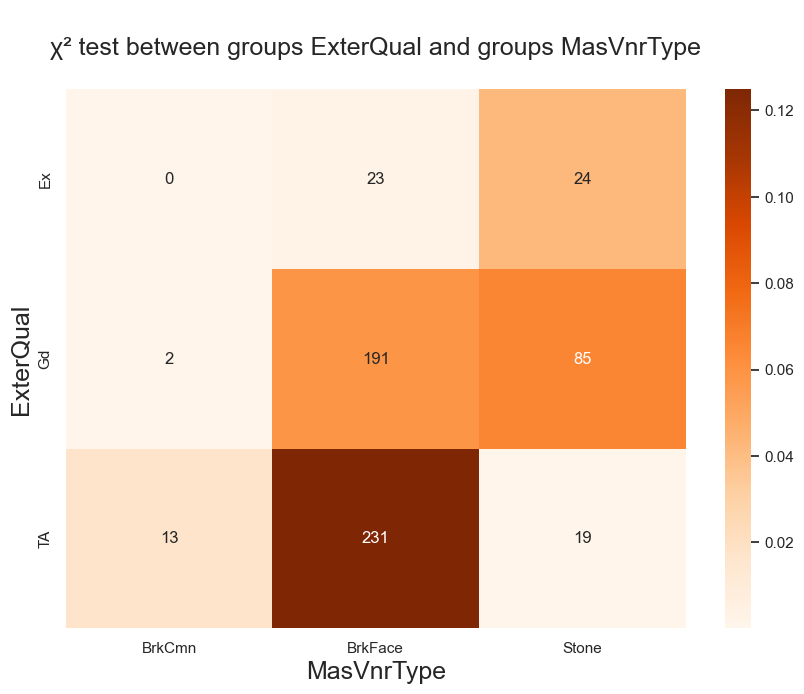

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.1626591994363518e-15



P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [67]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [68]:
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

In [69]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 26)

Test set shape (Categorical features): (1459, 25)



Text(0, 0.5, 'Column Name\n')

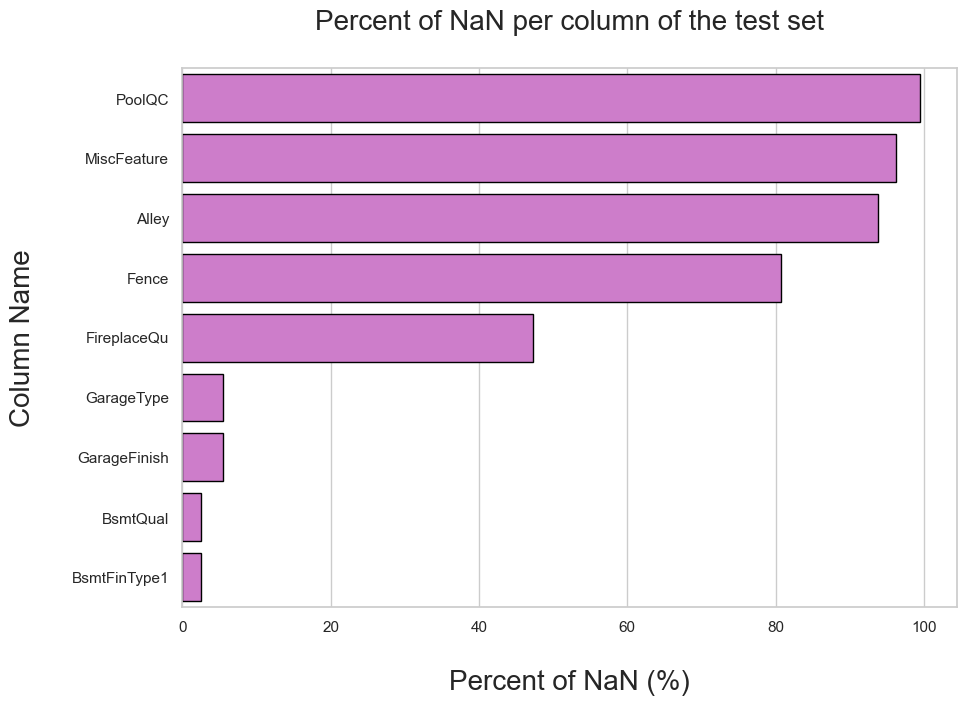

In [70]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [71]:
tab

Column  Percent_NaN
6        PoolQC        99.52
8   MiscFeature        96.30
0         Alley        93.77
7         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55
1      BsmtQual         2.53
2  BsmtFinType1         2.53

In [72]:
large_na = [col for col in column_with_nan if (df_train_categ[col].isna().sum()/df_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

df_train_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [73]:
categ_fill_null = {"GarageType": df_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)


In [74]:
df_test_categ.drop(large_na, axis=1, inplace=True)

In [75]:
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Text(0, 0.5, 'Column Name\n')

In [76]:
categ_fill_null = {"GarageType": df_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": df_test_categ["SaleType"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)


In [77]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 21)

Test set shape (Categorical features): (1459, 20)



In [78]:
df_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

In [79]:
df_train_dummies = pd.get_dummies(df_train_categ)
df_train_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             False        False        False         True        False   
1             False        False        False         True        False   
2             False        False        False         True        False   
3             False        False        False         True        False   
4             False        False        False         True        False   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0         False         False         False          True             False   
1         False         False         False          True             False   
2          True         False         False         False             False   
3          True         False         False         False              True   
4          True         False         False         False             False   

   ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0  ...           False         False         False         True   
1  ...           False         False         False         True   
2  ...           False         False         False         True   
3  ...           False         False         False         True   
4  ...           False         False         False         True   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                  False                  False                 False   
1                  False                  False                 False   
2                  False                  False                 False   
3                   True                  False                 False   
4                  False                  False                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                 False                  True                  False  
1                 False                  True                  False  
2                 False                  True                  False  
3                 False                 False                  False  
4                 False                  True                  False  

[5 rows x 140 columns]

In [80]:
df_test_dummies = pd.get_dummies(df_test_categ)
df_test_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             False        False         True        False        False   
1             False        False        False         True        False   
2             False        False        False         True        False   
3             False        False        False         True        False   
4             False        False        False         True        False   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0         False         False         False          True             False   
1          True         False         False         False              True   
2          True         False         False         False             False   
3          True         False         False         False             False   
4          True         False         False         False             False   

   ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0  ...           False         False         False         True   
1  ...           False         False         False         True   
2  ...           False         False         False         True   
3  ...           False         False         False         True   
4  ...           False         False         False         True   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                  False                  False                 False   
1                  False                  False                 False   
2                  False                  False                 False   
3                  False                  False                 False   
4                  False                  False                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                 False                  True                  False  
1                 False                  True                  False  
2                 False                  True                  False  
3                 False                  True                  False  
4                 False                  True                  False  

[5 rows x 137 columns]

In [81]:
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_train_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']

Features present in df_test_categ set and absent in df_train_categ: []


In [82]:
df_train_dummies.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


In [83]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")
print(f"Test set shape (Categorical features): {df_test_dummies.shape}\n")

Training set shape (Categorical features): (1460, 137)

Test set shape (Categorical features): (1459, 137)



In [84]:
# Training set
df_train_new = pd.concat([df_train_imputed, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = pd.concat([df_test_imputed, df_test_dummies], axis = 1)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 151)
Test set: (1459, 150)


In [85]:
# Let's handle the outliers in some predictors kept in our training set
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "BsmtFinSF1"
outliers3 = df_train_new[(df_train_new["BsmtFinSF1"] > 4000)].index.tolist()

# Outliers in "OpenPorchSF"
outliers4 = df_train_new[(df_train_new["OpenPorchSF"] > 500) & (
    df_train_new["SalePrice"] <= 100000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3 + outliers4
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1298, 523, 495]


In [86]:
# Convert Year of construction to the Age of the house since the construction
df_train_new["AgeSinceConst"] = (df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = (df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"])

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [87]:
df_train_new["AgeSinceRemod"] = (df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [88]:
df_test_new.head()

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageCars  MasVnrArea  \
0         5.00     896.00       882.00      1.00        1.00        0.00   
1         6.00   1,329.00     1,329.00      1.00        1.00      108.00   
2         5.00   1,629.00       928.00      2.00        2.00        0.00   
3         6.00   1,604.00       926.00      2.00        2.00       20.00   
4         8.00   1,280.00     1,280.00      2.00        2.00        0.00   

   BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  ...  SaleType_Oth  \
0      468.00      0.00        0.00      140.00  ...         False   
1      923.00      0.00        0.00      393.00  ...         False   
2      791.00    701.00        1.00      212.00  ...         False   
3      602.00    678.00        1.00      360.00  ...         False   
4      263.00      0.00        0.00        0.00  ...         False   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         True                  False                  False   
1         True                  False                  False   
2         True                  False                  False   
3         True                  False                  False   
4         True                  False                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                  True   
4                 False                 False                  True   

   SaleCondition_Partial  AgeSinceConst  AgeSinceRemod  
0                  False          49.00          49.00  
1                  False          52.00          52.00  
2                  False          13.00          12.00  
3                  False          12.00          12.00  
4                  False          18.00          18.00  

[5 rows x 150 columns]

In [89]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea", "OpenPorchSF", "BsmtFinSF1",
                       "FullBath", "GarageCars","MasVnrArea", "Fireplaces", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

OverallQual  TotalBsmtSF  GrLivArea  OpenPorchSF  BsmtFinSF1  FullBath  \
0         7.00       856.00   1,710.00        61.00      706.00      2.00   
1         6.00     1,262.00   1,262.00         0.00      978.00      2.00   
2         7.00       920.00   1,786.00        42.00      486.00      2.00   
3         7.00       756.00   1,717.00        35.00      216.00      1.00   
4         8.00     1,145.00   2,198.00        84.00      655.00      2.00   

   GarageCars  MasVnrArea  Fireplaces  AgeSinceConst  AgeSinceRemod  
0        2.00      196.00        0.00           7.00           7.00  
1        2.00        0.00        1.00          34.00          34.00  
2        2.00      162.00        1.00           9.00           8.00  
3        3.00        0.00        1.00          95.00          40.00  
4        3.00      350.00        1.00          10.00          10.00

In [90]:
df_skew_verify = df_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['TotalBsmtSF', 'GrLivArea', 'OpenPorchSF', 'BsmtFinSF1', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [91]:
# Log transformation of the skewed features
for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

In [92]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [93]:
df_train_new

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageCars  MasVnrArea  \
0            7.00       7.44         6.75      2.00        2.00        5.28   
1            6.00       7.14         7.14      2.00        2.00        0.00   
2            7.00       7.49         6.83      2.00        2.00        5.09   
3            7.00       7.45         6.63      1.00        3.00        0.00   
4            8.00       7.70         7.04      2.00        3.00        5.86   
...           ...        ...          ...       ...         ...         ...   
1452         6.00       7.41         6.86      2.00        2.00        0.00   
1453         6.00       7.64         7.34      2.00        2.00        4.79   
1454         7.00       7.76         7.05      2.00        1.00        0.00   
1455         5.00       6.98         6.98      1.00        1.00        0.00   
1456         5.00       7.14         7.14      1.00        1.00        0.00   

      BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  ...  SaleType_WD  \
0           6.56    854.00        0.00        0.00  ...         True   
1           6.89      0.00        0.69      298.00  ...         True   
2           6.19    866.00        0.69        0.00  ...         True   
3           5.38    756.00        0.69        0.00  ...         True   
4           6.49  1,053.00        0.69      192.00  ...         True   
...          ...       ...         ...         ...  ...          ...   
1452        0.00    694.00        0.69        0.00  ...         True   
1453        6.67      0.00        1.10      349.00  ...         True   
1454        5.62  1,152.00        1.10        0.00  ...         True   
1455        3.91      0.00        0.00      366.00  ...         True   
1456        6.72      0.00        0.00      736.00  ...         True   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                     False                  False                 False   
1                     False                  False                 False   
2                     False                  False                 False   
3                      True                  False                 False   
4                     False                  False                 False   
...                     ...                    ...                   ...   
1452                  False                  False                 False   
1453                  False                  False                 False   
1454                  False                  False                 False   
1455                  False                  False                 False   
1456                  False                  False                 False   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                    False                  True                  False   
1                    False                  True                  False   
2                    False                  True                  False   
3                    False                 False                  False   
4                    False                  True                  False   
...                    ...                   ...                    ...   
1452                 False                  True                  False   
1453                 False                  True                  False   
1454                 False                  True                  False   
1455                 False                  True                  False   
1456                 False                  True                  False   

      AgeSinceConst  AgeSinceRemod  SalePriceLog  
0              2.08           2.08         12.25  
1              3.56           3.56         12.11  
2              2.30           2.20         12.32  
3              4.56           3.71         11.85  
4              2.40           2.40         12.43  
...             ...            ...           ...  
1452           2.48  

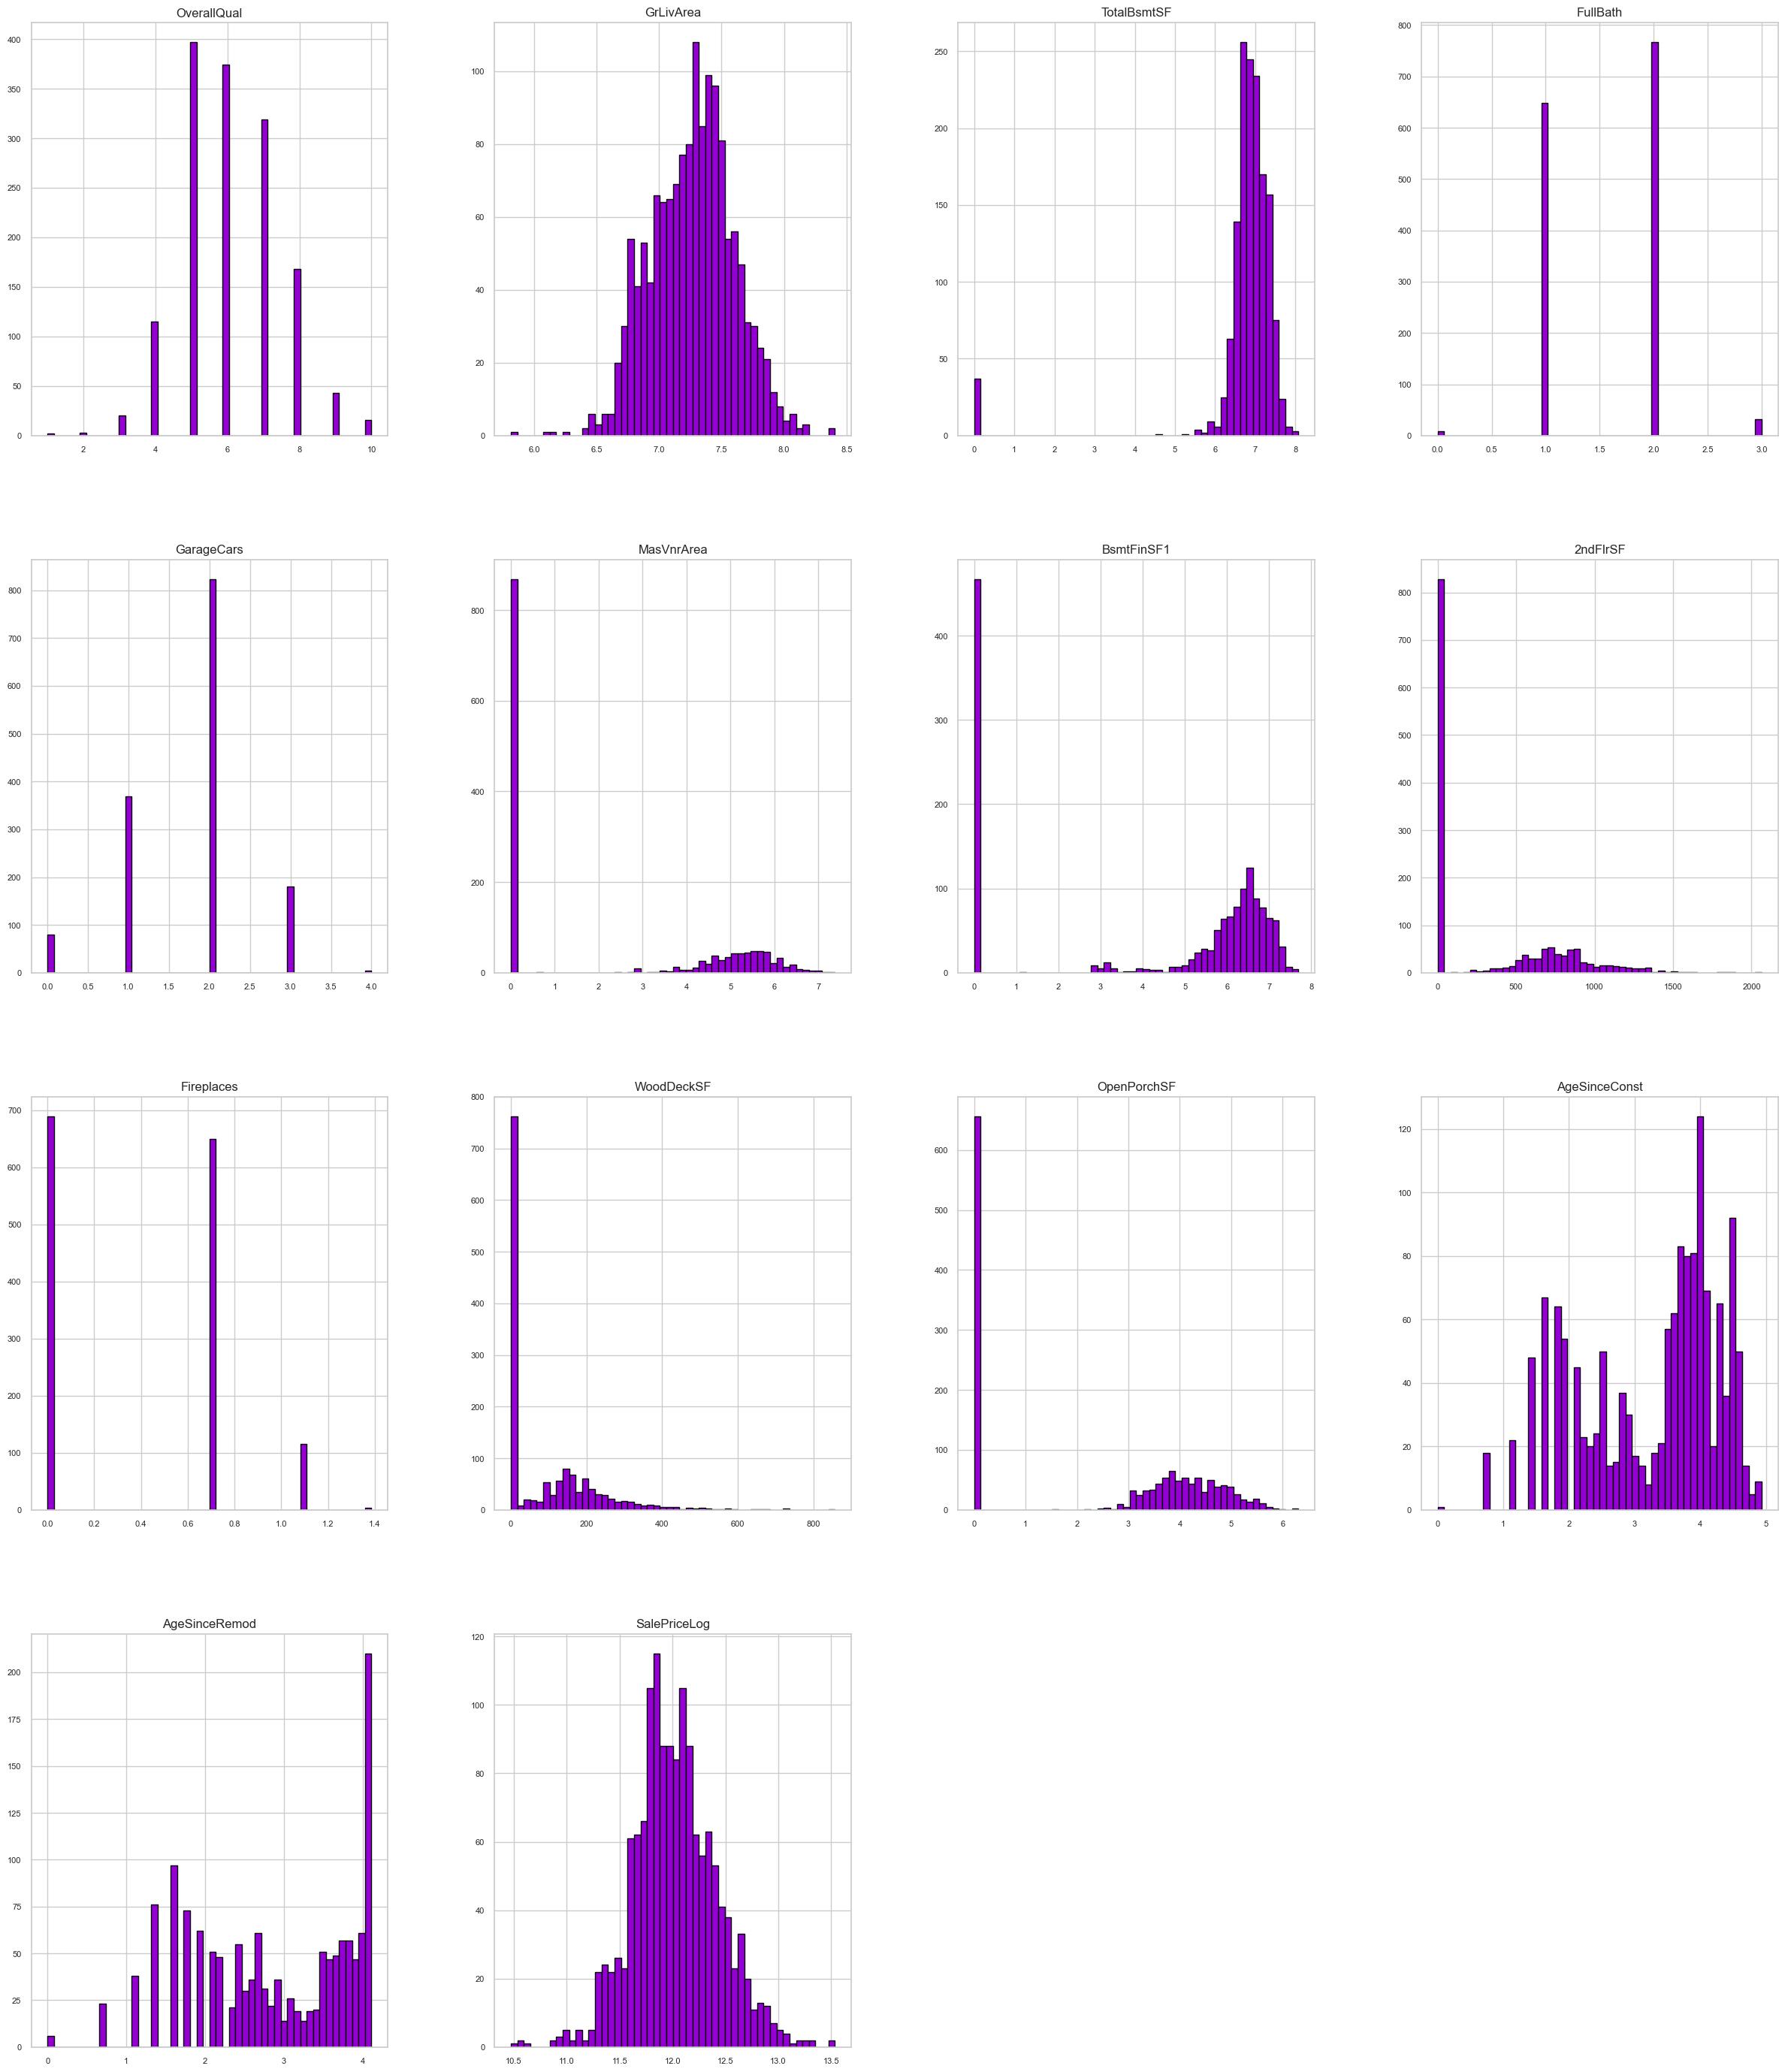

In [94]:
numerical_cols_new = [cname for cname in df_train_new.columns if 
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

In [96]:
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1457, 150)
(1457,)


In [97]:
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1165, 150)
y_train:(1165,)

X_test:(292, 150)
y_test:(292,)


In [98]:
from sklearn import preprocessing

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

In [100]:
import statsmodels.api as sm #Cross-sectional models and methods.
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.

In [101]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : Exterior1st_Wd Sdng, 0.9981592087088896 
worst_feature : Neighborhood_NPkVill, 0.995341933261182 
worst_feature : Exterior1st_AsphShn, 0.972411403666285 
worst_feature : Condition1_RRNn, 0.9648431304486444 
worst_feature : Condition1_RRAn, 0.9871071141767873 
worst_feature : Neighborhood_SawyerW, 0.9582236239623603 
worst_feature : Neighborhood_CollgCr, 0.970814930592819 
worst_feature : MSZoning_RH, 0.9537333344008118 
worst_feature : Foundation_PConc, 0.9309385191172377 
worst_feature : Neighborhood_Blmngtn, 0.9300293459971452 
worst_feature : Exterior1st_BrkComm, 0.9093007548054777 
worst_feature : HouseStyle_2Story, 0.8735905758107287 
worst_feature : ExterCond_TA, 0.8410316458286503 
worst_feature : SaleType_CWD, 0.8112285775087982 
worst_feature : SaleType_ConLI, 0.9389480385063589 
worst_feature : SaleType_ConLD, 0.9674507404488205 
worst_feature : GarageFinish_RFn, 0.809702887004144 
worst_feature : SaleType_Con, 0.7887897299245421 
worst_feature : BsmtQual_Gd, 

In [102]:
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

VIF Factor              features
0         3.80           OverallQual
1         4.80             GrLivArea
2         1.40           TotalBsmtSF
3         2.40            GarageCars
4        20.60            BsmtFinSF1
5        10.00              2ndFlrSF
6         1.70            Fireplaces
7         1.20            WoodDeckSF
8         1.50           OpenPorchSF
9         1.20      MSZoning_C (all)
10        1.60           MSZoning_RM
11        1.10          LotShape_IR2
12        1.10     LotConfig_CulDSac
13        1.30  Neighborhood_BrkSide
14        1.10  Neighborhood_ClearCr
15        1.20  Neighborhood_Crawfor
16        1.20  Neighborhood_Edwards
17        1.30  Neighborhood_NoRidge
18        1.50  Neighborhood_NridgHt
19        1.20  Neighborhood_StoneBr
20        1.10  Neighborhood_Veenker
21        1.10       Condition1_Norm
22        1.50       BldgType_Duplex
23        1.30        BldgType_Twnhs
24        1.40       BldgType_TwnhsE
25        2.00     HouseStyle_1.5Fin
26        1.30     HouseStyle_1.5Unf
27        9.30     HouseStyle_1Story
28        2.00     HouseStyle_SFoyer
29        2.00       HouseStyle_SLvl
30        1.20   Exterior1st_BrkFace
31        1.20   Exterior1st_MetalSd
32        1.30   Exterior1st_Plywood
33        1.10    Exterior1st_Stucco
34        1.10          ExterCond_Ex
35        1.20          ExterCond_Fa
36        1.10          ExterCond_Po
37        1.80     Foundation_BrkTil
38        1.10      Foundation_Stone
39        1.80           BsmtQual_Ex
40        1.10      BsmtFinType1_LwQ
41       20.40      BsmtFinType1_Unf
42        9.30          HeatingQC_Ex
43        5.20          HeatingQC_Gd
44        7.00          HeatingQC_TA
45        1.50        KitchenQual_Ex
46        4.40     GarageType_Attchd
47        5.00     GarageType_Detchd
48        1.70          SaleType_COD
49        3.00           SaleType_WD
50        1.90  SaleCondition_Normal
51        6.10         AgeSinceConst
52        2.80         AgeSinceRemod

In [105]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['BsmtFinSF1', 'BsmtFinType1_Unf']


In [106]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

In [107]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [108]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: [1012]


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [111]:
model_lin = LinearRegression()

In [112]:
scores_lin = cross_val_score(model_lin, X_train, y_train,
                 cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

Mean scores (Linear Model):
 0.8992544301330616
Standard deviation of scores (Linear Model):
 0.011194536987094711


In [113]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

**** Regressor: Linear ****
R²: 0.8824313565034515
RMSE: 0.14001832968298522



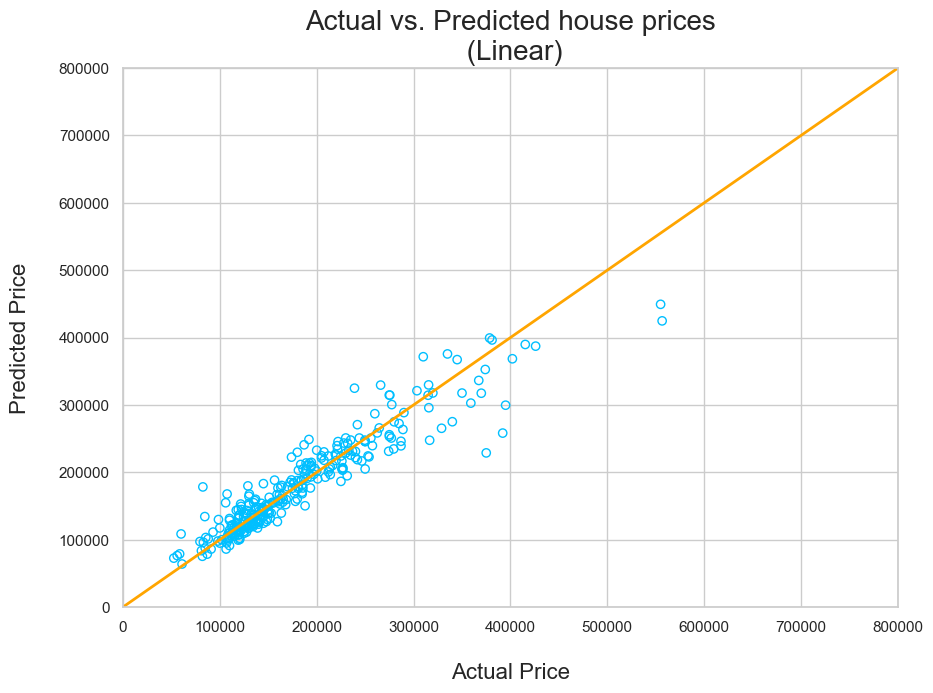

In [114]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()